In [1]:
import os
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from mindstorm import statplot
from tesser import tasks
from tesser import figures

main_dir = os.environ['TESSER_DIR']
data_dir = os.path.join(main_dir, 'Data')
fig_dir = os.path.join(main_dir, 'Figures', 'plots')

In [2]:
induct = tasks.load_induct(data_dir)
induct.head()

,subject,trial,trial_type,environment,community,cue,opt1,opt2,within,response,response_time,correct
0,100,1,central,ocean,1,2,16,20,2,NaN,NaN,0
1,100,2,boundary2,desert,2,4,10,19,1,2.0,2.974157,0
2,100,3,central,desert,2,5,6,2,1,1.0,3.190848,1
3,100,4,central,ocean,1,2,9,19,2,2.0,3.373906,1
4,100,5,central,ocean,1,1,19,13,1,2.0,3.094699,0


In [3]:
m = (induct.groupby(['subject', 'trial_type'])['correct'].mean() - .5) * 2

In [4]:
dark = sns.blend_palette(
    [
        np.array([20, 125, 201]) / 256, 
        np.array([0, 166, 161]) / 256, 
        np.array([15, 175, 75]) / 256,
    ], n_colors=3
)
dark

[(0.078125, 0.48828125, 0.78515625),
 (0.00022977941176470588, 0.6485753676470588, 0.6275888480392157),
 (0.05859375, 0.68359375, 0.29296875)]

In [5]:
light = sns.blend_palette(
    [
        np.array([171, 212, 237]) / 256, 
        np.array([172, 235, 242]) / 256, 
        np.array([165, 232, 177]) / 256,
    ], n_colors=3
)
light

[(0.66796875, 0.828125, 0.92578125),
 (0.6717677696078431, 0.9179227941176471, 0.9443167892156863),
 (0.64453125, 0.90625, 0.69140625)]

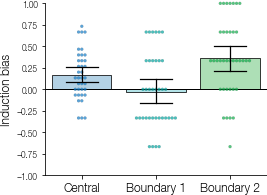

In [6]:
fig, ax = plt.subplots(figsize=(4, 3))
statplot.plot_swarm_bar(
    m,
    x='trial_type',
    y='correct',
    dark=dark,
    light=light,
    point_kws={'clip_on': False},
    ax=ax,
)
ax.set(
    ylim=(-1, 1), ylabel='Induction bias',
    xticklabels=['Central', 'Boundary 1', 'Boundary 2']
)
x_lim = ax.get_xlim()
ax.hlines(0, *x_lim)
ax.set_xlim(*x_lim);
fig.savefig(os.path.join(fig_dir, 'temporal_bias.pdf'))

In [7]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.7.6
IPython version      : 7.11.1

matplotlib: 3.1.3
seaborn   : 0.11.1
mindstorm : 0.7.0
numpy     : 1.18.1
tesser    : 0.1.0
scipy     : 1.4.1

